## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)

<a id='intro'></a>
### Introduction

For this project, we will be working to understand the results of an A/B test run by an e-commerce website.  The goal is to work through this notebook is to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
#The number of rows in the dataset.
number_rows = df.shape[0]
print("Number of rows: {}".format(number_rows))
#print(len(df))

Number of rows: 294478


In [4]:
#The number of unique users in the dataset.
num_unique_users = len(df.user_id.unique())
print("Number of unique users: {}".format(num_unique_users))

Number of unique users: 290584


In [5]:
#The proportion of users converted.
df['converted'].mean()

0.11965919355605512

In [6]:
#The number of times the new_page and treatment don't line up.
#treatment_new_pg = df[df(['group']=='treatment') & df(['landing_page']=='new_page')]
#control_old_page = df[df(['group']=='control') & df(['landing_page']=='old_page')]
mismatch_treatment_to_old_pg = df.query("group=='treatment' & landing_page =='old_page'")
mismatch_control_to_new_page = df.query("group=='control' & landing_page =='new_page'")

In [7]:
total_ttop = len(mismatch_treatment_to_old_pg)
total_ctnp = len(mismatch_control_to_new_page)
print(total_ttop+total_ctnp)

3893


In [8]:
# check for missing values
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Drop rows and create a new dataset that meets the specifications from the classroom quiz.  Store your new dataframe in **df2**.

In [9]:
#make a copy of the df
df2 = df

In [10]:
df2.drop(mismatch_treatment_to_old_pg.index, inplace=True)
df2.drop(mismatch_control_to_new_page.index, inplace=True)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [12]:
#unique user_ids in df2
len(df2.user_id.unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2.duplicated().sum()

0

In [14]:
print(df2.user_id.duplicated())

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
          ...  
294448    False
294449    False
294450    False
294451    False
294452    False
294453    False
294454    False
294455    False
294456    False
294457    False
294458    False
294459    False
294460    False
294461    False
294462    False
294463    False
294464    False
294465    False
294466    False
294467    False
294468    False
294469    False
294470    False
294471    False
294472    False
294473    False
294474    False
294475    False
294476    False
294477    False
Name: user_id, Length: 2

In [15]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [16]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
#drop
df2.drop(labels=1899, axis=0, inplace=True)
#confirm
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
control_conversion = df2[df2['group'] == 'control']['converted'].mean()
control_conversion

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
treatment_conversion = df2[df2['group'] == 'treatment']['converted'].mean()
treatment_conversion

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
df2['landing_page'].replace({'old_page':0,'new_page':1},inplace=True)
#df2['landing_page'].mean()
#df2['landing_page'].value_counts()[0]/len(df2)
#df.converted.sum()/len(df)

In [22]:
df2['landing_page'].mean()

0.5000619442226688

In [23]:
obs_diff = treatment_conversion - control_conversion

e. Is there evidence to suggest that one page leads to more conversions?  

> The control group which was shown the old page had a higher conversion rate. However, the difference is small at .2%. Given the current data, the new page has a lower conversion rate than the old, control page.  Conclusion: we need more information to make a final decision. 
Further questions to consider:
* did change aversion play a role in the results?
* how did test span duration impact results?

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?   

`1.` For now, consider you need to make the decision just based on all the data provided.  Assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%.

> Null hypothesis 

> **$H_{0}$**: **$p_{new}$** −  **$p_{old}$** ≤ 0

> Alternative hypothesis

> **$H_{1}$**: **$p_{new}$** −  **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. 

Use a sample size for each page equal to the ones in **ab_data.csv**. 

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  

a. **convert rate** for $p_{new}$ under the null

In [24]:
p_new = df2['converted'].mean()
print(p_new)

0.11959708724499628


b. **convert rate** for $p_{old}$ under the null

In [25]:
p_old = df2['converted'].mean()
print(p_old)

0.11959708724499628


c. $n_{new}$

d. $n_{old}$

In [26]:
n_new, n_old = df2['landing_page'].value_counts()

print("n_new:", n_new, "\nn_old:", n_old)

n_new: 145310 
n_old: 145274


In [27]:
#number of users that received the new page; where group = treatment
df2.query("group=='treatment'").count()

user_id         145310
timestamp       145310
group           145310
landing_page    145310
converted       145310
dtype: int64

In [28]:
#number of users that received the old page; where group = control
df2.query("group=='control'").count()

user_id         145274
timestamp       145274
group           145274
landing_page    145274
converted       145274
dtype: int64

In [29]:
#n_new = df2.query("group=='treatment'").count()

In [30]:
#n_old = df2.query("group=='control'").count()

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [31]:
new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new, (1 - p_new)])
#new_page_converted = np.random.binomial(1,p_new,n_new)
#new_page_converted = \
    #np.random.choice([0,1], size=n_new, p=[(1-p_new), p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [32]:
old_page_converted = np.random.choice([1,0], size=n_old, p=[p_old, (1-p_old)])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [33]:
new_page_converted.mean() - old_page_converted.mean()

0.0005141862086504162

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [34]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1,0], size=n_old, p=[p_old, (1-p_old)]).mean()
    diff=new_page_converted-old_page_converted
    p_diffs.append(diff)

i. histogram of the **p_diffs**.  

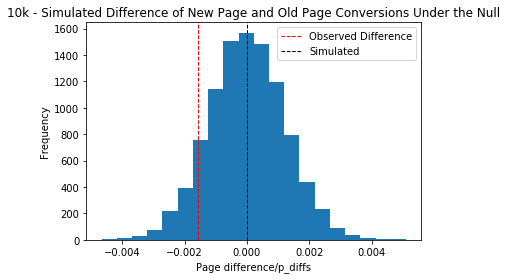

In [35]:
plt.hist(p_diffs, bins=20)
plt.title('10k - Simulated Difference of New Page and Old Page Conversions Under the Null')
plt.xlabel('Page difference/p_diffs')
plt.ylabel('Frequency')
plt.axvline(x=obs_diff, color='red', linewidth=1, linestyle='dashed',label="Observed Difference")
plt.axvline(x=(np.array(p_diffs).mean()), color='black', linestyle='dashed', linewidth=1, label="Simulated")           
plt.legend()
plt.show();

This simulated difference shows a mean of zero, this is what the data looks like under the null hypothesis. You can see how this differs from the observed difference. 

j. proportion of the **p_diffs** that are greater than the actual difference observed in **ab_data.csv**

In [36]:
p_diff = p_new - p_old
p_diff

0.0

In [37]:
p_diffs = np.array(p_diffs)
(p_diffs > obs_diff).mean()

0.90510000000000002

> k. A look at the p-value and statistical significance<br>
A p-value of 90% is significant and allows us to fail to reject the null hypothesis.

* A p-value helps determine the significance of results.

* The P value, or calculated probability, is the probability of finding the observed...given that the null hypothesis is true. 
* p-value is the chance that you'd get data that are as extreme as the data you have, from a random sample of points...the probability of the observed.
* The p-value is the level of marginal significance within a statistical hypothesis test representing the probability of the occurrence of a given event. The p-value is used as an alternative to rejection points to provide the smallest level of significance at which the null hypothesis would be rejected.


The p-value is a number between 0 and 1:
 - A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis...reject the null hypothesis.
 - A large p-value (> 0.05) indicates weak evidence against the null hypothesis...fail to reject the null hypothesis.
 - p-values very close to the cutoff (0.05) are marginal and require additional information.

l. We could also use a built-in to achieve similar results. Calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

/Users/Irene/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Read more](http://knowledgetack.com/python/statsmodels/proportions_ztest/) on using the built-in.

In [39]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

> n. About the z-score and p-value:<br>
A z-score shows the number of standard deviations from the mean a data point is, positive z-scores show that our data point is on the right side of the mean on the bell curve. 
This p value is very close to the p value that we calculated earlier. With this confirmed 90% p-value (using the built-in) we continue to fail to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` The result acheived in the previous A/B test can also be acheived by performing a Logistic regression.<br><br> 

> Logistic regression will work because each row is either a conversion or no conversion.

b. The goal is to use **statsmodels** to fit the regression model  specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, we first need to create a column for the intercept, and create a dummy variable column for which page each user received.  <br>Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [40]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,0,0
1,804228,2017-01-12 08:01:45.159739,control,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,1,0
4,864975,2017-01-21 01:52:26.210827,control,0,1


In [41]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,0,0
1,804228,2017-01-12 08:01:45.159739,control,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,1,0
4,864975,2017-01-21 01:52:26.210827,control,0,1


In [42]:
df_r = df2.copy()

In [43]:
df_r['intercept']=1
df_r[['control', 'treatment']] = pd.get_dummies(df['group'])

In [44]:
df_r.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,0,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,0,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,1,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,1,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,0,1,1,1,0


In [45]:
df_regression = df2.copy()

In [46]:
df_regression['intercept']=1
df_regression[['drop', 'ab_page']] = pd.get_dummies(df_regression['group'])
df_regression.drop(['drop'], axis=1, inplace=True)
df_regression.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,0,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,0,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,1,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,1,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,0,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [47]:
lrm = sm.Logit(df_regression['converted'],df_regression[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [48]:
results = lrm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 12 Aug 2018   Pseudo R-squ.:               8.077e-06
Time:                        16:42:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. The p-value associated with **ab_page**

> * p-value associated with ab_page = .19
* p-value calculated in part II = .90
* p-value calculated in part II with the built-in method = .90

> This difference is due to the null and alternative hypothesis. 
The main null hypothesis of a multiple logistic regression is that there is no relationship between the X variables and the Y variable; in other words, the Y values you predict from your multiple logistic regression equation are no closer to the actual Y values than you would expect by chance.

> Hypothesis from Part II <br>
>**$H_{0}$**: **$p_{new}$** −  **$p_{old}$** ≤ 0

>**$H_{1}$**: **$p_{new}$** −  **$p_{old}$** > 0

>H0= conversion probability for a user receiving the new page is less than or equal to that of a user receiving the old page

> Hypothesis from Part III Regression Model
>$$ H_{0}: p_{new} - p_{old} = 0$$$$ 
>H_{1}: p_{new} - p_{old} \neq 0$$
H0 = there is no relationship between which page a user is shown and the conversion rate.

f. Advantages and disadvantages to adding additional terms into the regression model

> It is advantagous to research additional factors and assess whether to add them to the model. For example, it could be worthwhile to look at
* prerequisiste knowledge
* prior conversions on similar sites
* traffic source
* CTR 
* age

> Disagvantages include potential multicollinearity, issues with higher order terms, and making the model too complex.

g. Review the impact if any of 'user country of access'  [Read more on merging here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  

In [49]:
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [50]:
df_c_merge = countries_df.set_index('user_id').join(df_regression.set_index('user_id'), how='inner')
df_c_merge.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,1,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,1,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,1,0,1,1


In [51]:
#See types and options for country
for  feature  in  ['country']:
    print("{}: {}".format(feature, countries_df[feature].unique()))

country: ['UK' 'US' 'CA']


In [52]:
df_c_merge['country'].astype(str).value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [53]:
#df_c_merge['country']['converted'].mean()
df_c_merge.groupby('country')['converted'].mean()

country
CA    0.115318
UK    0.120594
US    0.119547
Name: converted, dtype: float64

In [54]:
UK_treatment_conversion = df_c_merge[(df_c_merge['group']== 'treatment') & (df_c_merge['country'] == 'UK')]['converted'].mean()
UK_treatment_conversion

0.1211709965102753

In [55]:
UK_control_conversion = df_c_merge[(df_c_merge['group']== 'control') & (df_c_merge['country'] == 'UK')]['converted'].mean()
UK_control_conversion

0.12002200220022002

> The UK has a higher conversion rate overall. This is slightly higher in the treatment group.

h. Are there significant regional effects on conversion?

In [56]:
#create dummy variables
df_c_merge[['CA', 'UK', 'US']] = pd.get_dummies(df_c_merge['country'])
df_c_merge.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,0,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,1,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,1,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,0,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,1,0,1,1,0,1,0


In [57]:
#fit the linear model
linear_model_p3 = sm.OLS(df_c_merge['converted'], df_c_merge[['intercept', 'ab_page', 'US', 'UK']])
lin_results = linear_model_p3.fit()
lin_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.640
Date:                Sun, 12 Aug 2018   Prob (F-statistic):              0.178
Time:                        16:42:39   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290580   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1161      0.003     42.036      0.000       0.111       0.122
ab_page       -0.0016      0.001     -1.307      0.191      -0.004       0.001
US             0.0042      0.003      1.514      0.130      -0.001       0.010
UK             0.0053      0.003      1.784      0.074      -0.001       0.011
==============================================================================
Omnibus:                   125551.169   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414297.780
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#fit the logistical regression model
df_c_merge['intercept'] = 1

lm = sm.Logit(df_c_merge['converted'], df_c_merge[['intercept', 'US', 'CA']])
results_countries = lm.fit()
results_countries.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 12 Aug 2018   Pseudo R-squ.:               1.521e-05
Time:                        16:42:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
==============================================================================
"""

In [59]:
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [60]:
1/np.exp(-0.0099), np.exp(-0.0506)

(1.009949167117542, 0.95065885803307082)

In [61]:
1/np.exp(results_countries.params[1])

1.0099656034853544

* US web visitors/users are roughly as likely to convert as users from the UK (1.00)
* Canadian web visitors/users are .95 times more likely to convert as users from the UK
* The linear and regression models show low statistical significance given the high p-values. 

<a id='conclusions'></a>
## Finishing Up

In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

255